In [ ]:
Reference: https://towardsdatascience.com/k-nearest-neighbor-python-2fccc47d2a55

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [2]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [33]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

C:\Users\user\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
y_pred = knn.predict(X_test)

In [35]:
confusion_matrix(y_test, y_pred)

array([[42, 13],
       [ 9, 79]])

In [7]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, y_pred)

0.8461538461538461

In [9]:
from sklearn.metrics import precision_recall_fscore_support

In [10]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.82352941, 0.85869565]),
 array([0.76363636, 0.89772727]),
 array([0.79245283, 0.87777778]),
 array([55, 88], dtype=int64))

In [11]:
from sklearn.metrics import precision_score

In [12]:
precision_score(y_test, y_pred)

0.8586956521739131

In [13]:
from sklearn.metrics import recall_score

In [14]:
recall_score(y_test, y_pred)

0.8977272727272727

In [15]:
from sklearn.metrics import f1_score

In [16]:
f1_score(y_test, y_pred)

0.8777777777777778

C:\Users\user\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


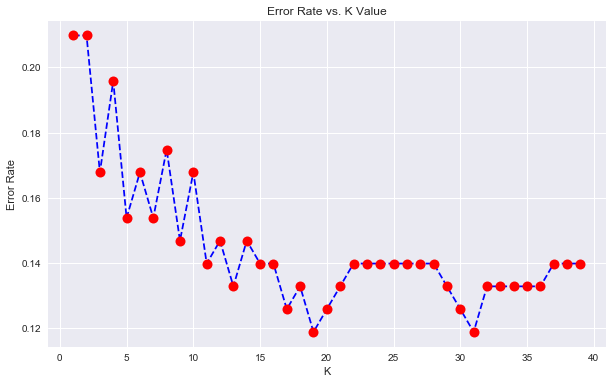

('Minimum error:-', 0.11888111888111885, 'at K =', 19)


In [40]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [37]:
knn = KNeighborsClassifier(n_neighbors=19, metric='euclidean')
knn.fit(X_train, y_train)

C:\Users\user\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')

In [38]:
y_pred = knn.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred)

0.8811188811188811